In [101]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,plot_roc_curve
from sklearn.metrics import log_loss

In [125]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/winemag.csv')
print(df.columns)
print("Missed region_1:")
print(df['region_1'].isnull().sum())
print(round(df['region_1'].isnull().sum() * 100 / len(df),1),"%")
print("Missed region_2:")
print(df['region_2'].isnull().sum())
print(round(df['region_2'].isnull().sum() * 100 / len(df),1),"%")
print("Missed designation:")
print(df['designation'].isnull().sum())
print(round(df['designation'].isnull().sum() * 100 / len(df),1),"%")
df = df.drop(['index','description','designation','region_1','region_2'],axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['index', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
Missed region_1:
25060
16.6 %
Missed region_2:
89977
59.6 %
Missed designation:
45735
30.3 %


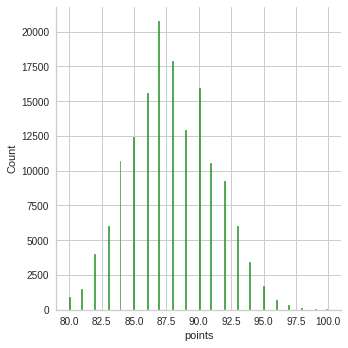

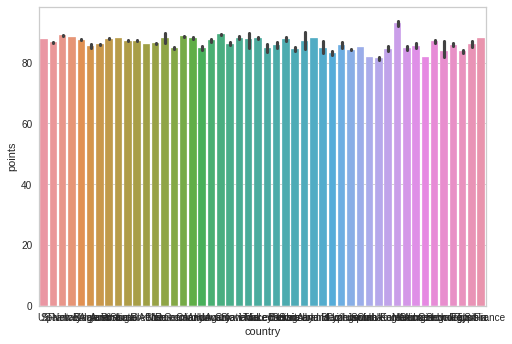

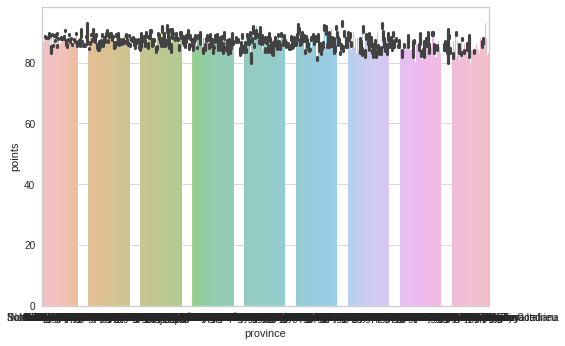

In [131]:
sns.displot(data=df,x='points',color='green')
plt.show()
sns.barplot(x='country',y='points', data=df);
plt.show()
sns.barplot(x='province',y='points', data=df);
plt.show()

In [132]:
print("Amount of unique values:")
print('country')
print(len(df['country'].unique()))
print('province')
print(len(df['province'].unique()))
print('variety')
print(len(df['variety'].unique()))
print('winery')
print(len(df['winery'].unique()))
print('points')
print(len(df['points'].unique()))
df = df.dropna(subset=['country'])
df = df.dropna(subset=['province'])
df = df.dropna(subset=['variety'])
df = df.dropna(subset=['winery'])
df = df.dropna(subset=['price'])
df = df.dropna(subset=['points'])
print("Amount:"+str(len(df)))

Amount of unique values:
country
49
province
456
variety
632
winery
14810
points
21
Amount:137230


In [133]:
def code_mean(data,cat_feature,real_feature):
  return (data[cat_feature].map(data.groupby(cat_feature)[real_feature].mean()))
df['winery_mean'] = code_mean(df,'winery','points')
df = df.drop(['winery'],axis=1)
df['country_mean'] = code_mean(df,'country','points')
df = df.drop(['country'],axis=1)
df['province_mean'] = code_mean(df,'province','points')
df = df.drop(['province'],axis=1)
df['variety_mean'] = code_mean(df,'variety','points')
df = df.drop(['variety'],axis=1)
print(df.columns)

Index(['points', 'price', 'winery_mean', 'country_mean', 'province_mean',
       'variety_mean'],
      dtype='object')


In [134]:
def performX(df):
  from sklearn import preprocessing
  columns = []
  for column in df.columns:
      columns.append(column)
  x = df.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df = pd.DataFrame(x_scaled)
  df.columns = columns
  return df

Cross-validation result:0.349


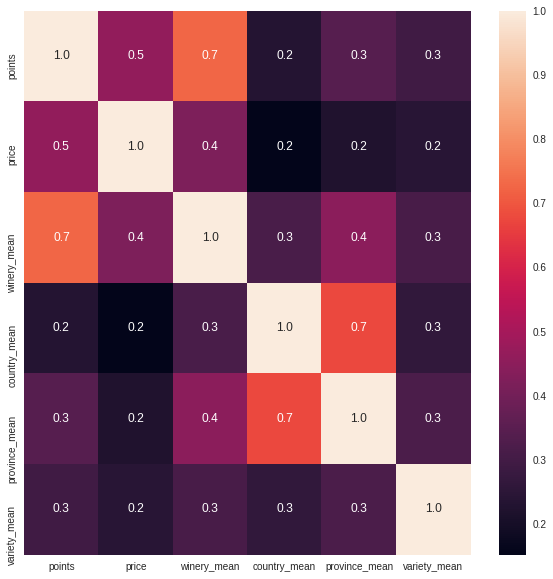

In [136]:
from sklearn.model_selection import train_test_split
dataX = performX(df.drop(['points'],axis=1)) #приводит данные к шкале от 0 до 1
dataY = df['points'] #отбор классифицируемого признака
train_x, test_x, train_y, test_y = train_test_split(dataX,dataY,test_size = 0.3,random_state = 11) #разделение выборки на обучающую и тестовую
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='manhattan') #создание классификатора k-ближайших соседей с использованием манхеттенской метрики
knn.fit(train_x, train_y) #обучение классификатора
#print(knn.score(test_x,test_y)) 
scores = cross_val_score(knn, dataX, dataY, cv=4)
print("Cross-validation result:"+str(round(scores.mean(),3)))
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

[[ 0  1  0  0  4  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3  1  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  4  4  3  3  2  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  5 12  9  5  2  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  8 16 22 12  7  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 17 24 18 16  6  1  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  2 13 12 37 24 12  3  1  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  2 12 30 36 24 13  7  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  6  8 25 32 23 15  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 15 17 16 22 16  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  8 19 21 30 17  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  6  8 16 15 21  7  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  4 10  8 22  8  4  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  4  6 12  4  3  1  0  1  0  0]
 [ 0  0  0  1  0  1  0  0  1  0  2  5  1  5  3  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  2  1  3  1  2  0  0

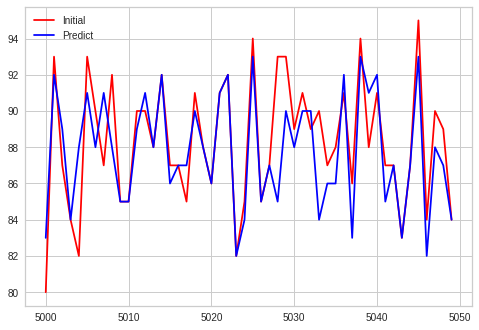

In [118]:
pred_y = knn.predict(test_x)
mat = confusion_matrix(test_y[0:1000], pred_y1[0:1000])
print(mat)

print("Accuracy:"+str(round(accuracy_score(pred_y,test_y),3)))
print("Precision:"+str(round(precision_score(pred_y, test_y,average='micro'),3)))
print("Recall:"+str(round(recall_score(pred_y, test_y,average='micro'),3)))
x = list(range(0, len(test_y)))
fig, ax = plt.subplots()
plt.plot(x[5000:5050],test_y[5000:5050],color="red")
plt.plot(x[5000:5050],pred_y[5000:5050],color="blue")
ax.legend(labels=["Initial","Predict"])
plt.show()

In [98]:
predicts = knn.predict_proba(test_x)    
print(log_loss(test_y,predicts))

10.134432724059542


0.30287352133887147

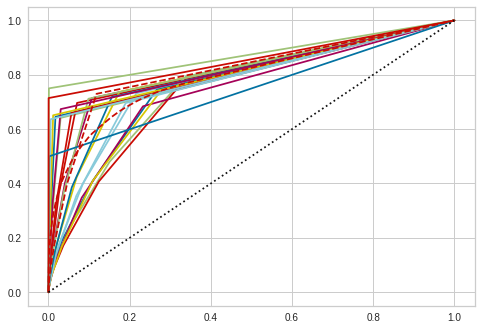

In [111]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

visualizer = ROCAUC(knn, classes=list(set(test_y)))

visualizer.fit(train_x, train_y)        # Fit the training data to the visualizer
visualizer.score(test_x, test_y)        # Evaluate the model on the test data          

Cross-validation result:0.521


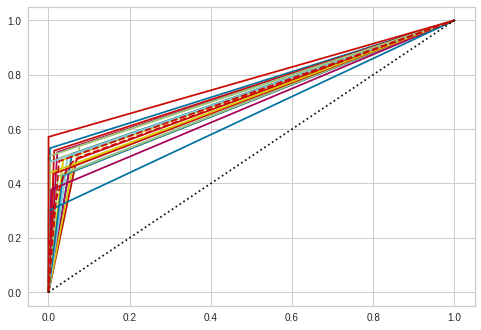

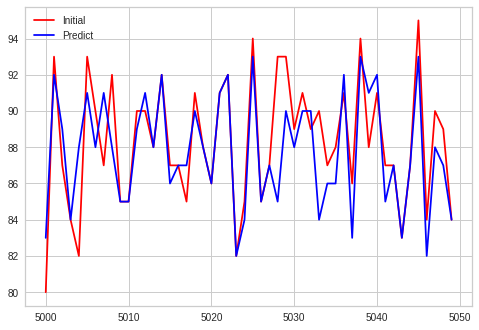

In [130]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=1,algorithm='ball_tree') #создание классификатора k-ближайших соседей с использованием манхеттенской метрики
knn.fit(train_x, train_y) #обучение классификатора
#print(knn.score(test_x,test_y)) 
scores = cross_val_score(knn, dataX, dataY, cv=4)
print("Cross-validation result:"+str(round(scores.mean(),3)))
visualizer = ROCAUC(knn, classes=list(set(test_y)))

visualizer.fit(train_x, train_y)        # Fit the training data to the visualizer
visualizer.score(test_x, test_y)
x = list(range(0, len(test_y)))
fig, ax = plt.subplots()
plt.plot(x[5000:5050],test_y[5000:5050],color="red")
plt.plot(x[5000:5050],pred_y[5000:5050],color="blue")
ax.legend(labels=["Initial","Predict"])
plt.show()  